# Mercedes-Benz-Greener-Manufacturing Project Submission
####  Actions have been performed below as mentioned in problem statement

## Importing Required Python Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visulization
import seaborn as sns #visualization
import xgboost as xgb # distributed gradient boosting library 
from xgboost.sklearn import XGBRegressor # 
import sklearn.metrics as metrics # accuarcy metrics
from sklearn.preprocessing import LabelEncoder # Encoding
%matplotlib inline

 ## Data PreProcessing
 

In [2]:

df_train=pd.read_csv('train.csv') # Loading training data 
df_test=pd.read_csv('test.csv') # Loading testing data


In [3]:
df_train.head() # Displaying the top 5 records of training data 

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head() # Displaying the top 5 records of testing data 

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape # Finding the number of rows and columns in training data 

(4209, 378)

In [6]:
df_test.shape # Finding the number of rows and columns in testing data 

(4209, 377)

In [7]:
df_train.info() # Getting the details 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


### 1.Check for null and unique values for test and train sets.

In [8]:

df_train.isnull().any().any() # Finding the missing values in training data 

False

In [9]:
df_test.isnull().any().any() # Finding the missing values in testing data 

False

In [10]:

df_train.dtypes.value_counts() #looking at the data types

int64      369
object       8
float64      1
dtype: int64

In [11]:
columns =df_train.columns # Taking all the column names of train data into a  list

In [12]:
# Finding the list of values for each feature
columns_not_required=[]
for col in columns:
    n_unique = df_train[col].unique()
    print(col,n_unique, len(n_unique))
    if len(n_unique)==1: 
        columns_not_required.append(col)

ID [   0    6    7 ... 8412 8415 8417] 4209
y [130.81  88.53  76.26 ...  85.71 108.77  87.48] 2545
X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 47
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 27
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 44
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 7
X4 ['d' 'b' 'c' 'a'] 4
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 29
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'] 12
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c'] 25

### Visualizing Target data 

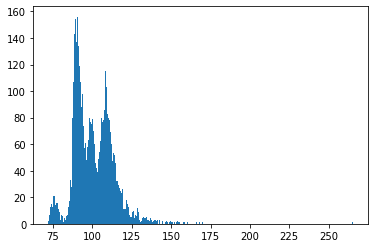

In [13]:
plt.hist(df_train.y, bins = 300) # Visulaizing the target variable- y
plt.show()

### 2. Outlier treatment

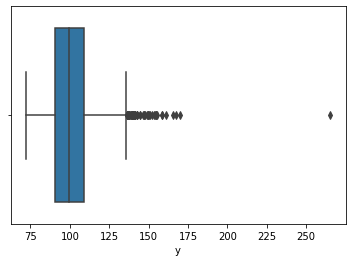

In [14]:
import seaborn as sns # Detecting outliers if any
sns.boxplot(df_train.y)

In [15]:

df_train=df_train[df_train['y']<135] # Removing outlier

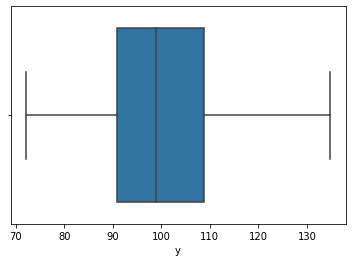

In [16]:
import seaborn as sns # Visualizing target variable after removing outlier
sns.boxplot(df_train.y)

In [17]:
df_train.shape #Verifying the shape after removing outlier

(4154, 378)

### 3. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [18]:
columns_not_required # Finding the features which have zero variance

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [19]:
df_train.drop(columns_not_required,axis=1,inplace=True) # removing the features with 0 variance from train data

In [20]:
df_test.drop(columns_not_required,axis=1,inplace=True) # removing the features with 0 variance from test data

### 4. Apply label encoder

In [21]:
y=df_train['y'] # storing target for train dataset

In [22]:
df_train.drop(['y'],axis=1,inplace=True) # Dropping target feature from train_data 

In [23]:
df_train_id=df_train['ID'] #storing target for train dataset

In [24]:
df_test_id=df_test['ID'] #storing target for test dataset

In [25]:
df_train['train']=1 #Assigning one feature for getting whether its train data or test data 
df_test['train']=0

In [26]:
df_all=pd.concat([df_train,df_test]) # Combining train and test data 

In [27]:
df_all.head() # getting top 5 rows for the combination of train and test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,train
0,0,k,v,at,a,d,u,j,o,0,...,0,1,0,0,0,0,0,0,0,1
1,6,k,t,av,e,d,y,l,o,0,...,0,0,0,0,0,0,0,0,0,1
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,1,0,0,0,1
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,1
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
label_columns=df_all.columns  # Finding features having 'Object' datatype
l_columns=[]
for cols in label_columns:
    if df_all[cols].dtype=='object':
        l_columns.append(cols)



In [29]:
l_columns

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [30]:
df_all[l_columns] 

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [31]:
label_encoder =LabelEncoder() # applying label encoder for categorical features
for cols in l_columns:
    df_all[cols]=label_encoder.fit_transform(df_all[cols].astype(str))


### 5. Perform dimensionality reduction.

In [32]:
from sklearn.decomposition import PCA # Dimensionlity Reduction
pca=PCA(n_components=0.99, random_state=500)
pca.fit(df_all)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=500,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
df_all[l_columns]

,X0,X1,X2,X3,X4,X5,X6,X8
0,37,23,19,0,3,27,9,14
1,37,21,21,4,3,31,11,14
2,24,24,37,2,3,30,9,23
3,24,21,37,5,3,30,11,4
4,24,23,37,5,3,14,3,13
...,...,...,...,...,...,...,...,...
4204,9,9,18,5,3,1,9,4
4205,46,1,8,3,3,1,9,24
4206,51,23,18,5,3,1,3,22
4207,10,23,18,0,3,1,2,16


In [34]:
df_train=df_all[df_all['train']==1] # Getting train_dataset from combined dataset

In [35]:
df_test=df_all[df_all['train']==0] # Getting test_dataset from combined dataset

In [36]:
df_train.drop(['train'],axis=1,inplace=True) # Removing train feature from Train_dataset

C:\Users\SHWETA\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,37,23,19,0,3,27,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,37,21,21,4,3,31,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,24,24,37,2,3,30,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,24,21,37,5,3,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,24,23,37,5,3,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test.drop(['train'],axis=1,inplace=True) # Removing train feature from Train_dataset

In [39]:
df_train.drop(['ID'],axis=1,inplace=True) #dropping ID feature from train dataset

In [40]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,37,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,18,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,37,5,3,32,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,18,2,3,31,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
df_test.drop(['ID'],axis=1,inplace=True) #dropping ID feature from test dataset

In [42]:
from sklearn.model_selection import train_test_split # performing train test split
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [43]:
X=df_train

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
xgb=XGBRegressor()

In [46]:

# Prepare dict of params for xgboost model.
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.35],
    'max_depth':[3,5,7,8,10,11,13,14,15],
    'min_child_weight':[1,3,5,7,9,10,11],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    
    }




In [47]:

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 

In [48]:
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)  # Hyperparameter tuning

In [49]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9],
         

In [50]:
random_search.best_estimator_ 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.9, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=11, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
random_search.best_params_

{'min_child_weight': 11,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.9,
 'colsample_bytree': 0.7}

In [63]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.9, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=11, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
xgb.fit(X_train,y_train) #fitting the training data to the model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.9, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=11, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
y_pred=xgb.predict(X_test) 

In [66]:
y_pred

array([110.64675, 110.21479, 110.95558, ..., 106.64889,  92.14055,
       104.32134], dtype=float32)

In [67]:
y_test1=y_test.round()

In [68]:
y_pred1=y_pred.round()

In [69]:
print("Accuracy:", accuracy_score(y_test1,y_pred1))

Accuracy: 0.06655974338412189


In [70]:
from sklearn.model_selection import cross_val_score # cross vallidation 
XGB_accuracies = cross_val_score(estimator = xgb, X = X, y = y, cv = 10)
print(XGB_accuracies)
print("Mean_XGB_Acc : ", XGB_accuracies.mean()) # averaage accuracy of the model

[0.6908938  0.63681731 0.62069939 0.65346958 0.67604361 0.55097204
 0.55319989 0.673316   0.70051    0.70820405]
Mean_XGB_Acc :  0.6464125670631696


In [71]:
y_predictions=xgb.predict(df_test) # predicting test dataset

In [72]:
df=pd.DataFrame()  # creating data frame for storing ID and predicted y value for test dataset.
df['ID']=df_test_id
df['y']=y_predictions

In [62]:
df.to_csv('submission.csv',index=False)